In [1]:
# make a matplotlib plot video for playback in colab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import count
from IPython.display import HTML

x = np.linspace(0, 2*np.pi, 30)
y = np.sin(x)

plt.ioff()
fig = plt.figure()

def update(i):
  plt.clf()
  plt.xlim(0, 2*np.pi)
  plt.ylim(-1,1)
  plt.plot(x[:i],y[:i])

anim = animation.FuncAnimation(fig=fig, func=update, frames=10, interval=200)
HTML(anim.to_html5_video())

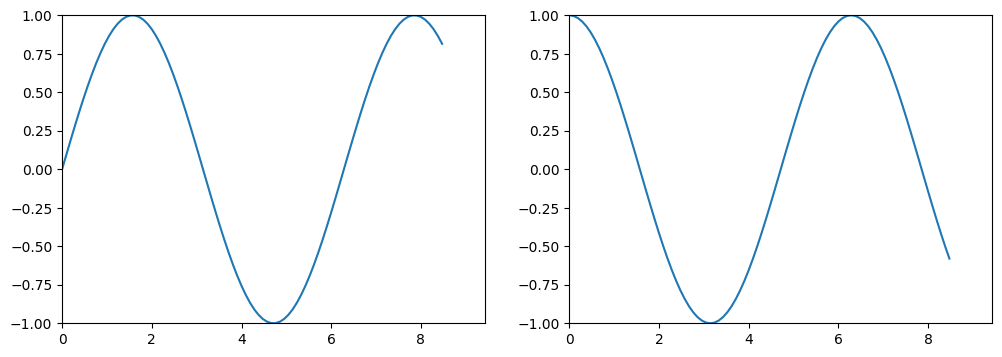

In [2]:
# live matplotlib plot in colab
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import time

x = np.linspace(0, 3*np.pi, 100)

plt.ioff()
plt.figure(figsize=(12,4))
def update_plot(i):
  plt.clf() # clear frame buffer
  plt.subplot(121)
  plt.xlim(0,3*np.pi)
  plt.ylim(-1,1)
  plt.plot(x[:10*i], np.sin(x[:10*i])) # render to buffer

  plt.subplot(122)
  plt.xlim(0,3*np.pi)
  plt.ylim(-1,1)
  plt.plot(x[:10*i], np.cos(x[:10*i])) # render to buffer
  #plt.pause(1)
  display.clear_output(wait=True) # wait to show
  display.display(plt.gcf()) # blit
  time.sleep(1)

for i in range(10):
  print(i)
  update_plot(i)

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import count
from collections import namedtuple,deque

torch.manual_seed(1)

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 1, kernel_size=3, padding=1, stride=1) # 3x3 n3wh -> n1wh
    self.relu1 = nn.ReLU()
    self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2) # 2x3 n5w/2h/2
    self.conv2 = nn.Conv2d(1,1, kernel_size=1, padding=0, stride=1) # 1x1 n4w/2h/2
    self.relu2 = nn.ReLU()
    self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2) # 2x2x2 n2w/4h/4

  def __call__(self, x):
    print('input',x)
    x = self.conv1(x)
    print('after conv1', [p for p in self.conv1.parameters()], x)
    x = self.relu1(x)
    print('after relu1', [p for p in self.relu1.parameters()], x)
    x = self.maxpool1(x)
    print('after maxpoll1', [p for p in self.maxpool1.parameters()], x)
    x = self.conv2(x)
    print('after conv2', [p for p in self.conv2.parameters()], x)
    x = self.relu2(x)
    print('after relu2', [p for p in self.relu2.parameters()], x)
    x = self.maxpool2(x)
    print('after maxpool2', [p for p in self.maxpool2.parameters()], x)
    return x

net = Net()

def init_weights(m):
  if type(m) == nn.Linear or type(m) == nn.Conv2d:
    m.weight.data = torch.ones(m.weight.shape)
    m.weight.data /= m.weight.data.sum(dim=(2,3), keepdim=True)
    m.bias.data = torch.zeros(m.bias.shape)
    print(m.weight.nelement(), m.weight.shape)

net.apply(init_weights)

#for p in net.parameters():
#  print(p.shape)

#for key in net.state_dict():
#  print(key, net.state_dict()[key])

input = torch.ones(3*4*4).reshape(3,4,4).float().unsqueeze(0)
y = net(input)
y

27 torch.Size([1, 3, 3, 3])
1 torch.Size([1, 1, 1, 1])
input tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])
after conv1 [Parameter containing:
tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]],

         [[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]],

         [[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]], requires_grad=True), Parameter containing:
tensor([0.], requires_grad=True)] tensor([[[[1.3333, 2.0000, 2.0000, 1.3333],
          [2.0000, 3.0000, 3.0000, 2.0000],
          [2.0000, 3.0000, 3.0000, 2.0000],
          [1.3333, 2.

tensor([[[[3.0000]]]], grad_fn=<MaxPool2DWithIndicesBackward0>)

In [23]:
27/9

3.0